In [57]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

pd.set_option('display.max_rows', 10)
cb=pd.read_csv('2018.csv') #2018 csv file
cb

,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,01/10/2018,Attackers linked to Saudi Arabia?,Canadian permanent resident and Saudi dissiden...,A report from The Citizen Lab reveals that the...,Malware/PoS Malware,X Individual,Cyber Espionage,CA,Link
1,01/10/2018,?,Apollo,"Apollo, a sales engagement startup boasting a ...",Unknown,S Other service activities,Cyber Crime,US,Link
2,01/10/2018,Roaming Mantis,iOS Users,Kaspersky discover that the Roaming Mantis gro...,Malicious Script Injection,X Individual,Cyber Crime,>1,Link
3,02/10/2018,Hidden Cobra AKA Lazarus Group,US Banks,"A joint technical alert from the DHS, the FBI,...",Malware/PoS Malware,K Financial and insurance activities,Cyber Crime,US,Link
4,02/10/2018,?,SBM Holdings (State Bank of Mauritius India),Mauritius banking group SBM Holdings unveils t...,Fraudulent SWIFT Transactions,K Financial and insurance activities,Cyber Crime,IN,Link
...,...,...,...,...,...,...,...,...,...
1332,28/09/2018,?,Developers of Google Chrome extensions,Developers of Google Chrome extensions are tar...,Account Hijacking,X Individual,Cyber Crime,>1,Link
1333,29/09/2018,CyberSecurity & Intelligence (CSI),Virat Kohli’s official website,Following the defeat of the Bangladeshi cricke...,Defacement,X Individual,Cyber Crime,IN,Link
1334,29/09/2018,?,Customers of Brazilian Banks,Security researchers from Qihoo 360 NetLab unc...,Malware/PoS Malware,K Financial and insurance activities,Cyber Crime,BR,Link
1335,29/09/2018,baidu3250617231,Gwinnett Medical Center (GMC),Gwinnett Medical Center(GMC) is hacked and the...,Unknown,Q Human health and social work activities,Cyber Crime,US,Link


In [58]:
cb.describe() #what is inside this file

,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
count,1337,1331,1334,1334,1337,1337,1337,1301,1334
unique,324,199,1116,1331,106,21,4,71,1
top,20/07/2018,?,Single Individuals,A hacker breaks into two consumer spyware comp...,Malware/PoS Malware,X Individual,Cyber Crime,US,Link
freq,12,1065,85,2,376,301,1094,456,1334


In [59]:
cb= cb[cb.Country == 'US'] # only include US attacks
cb

,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
1,01/10/2018,?,Apollo,"Apollo, a sales engagement startup boasting a ...",Unknown,S Other service activities,Cyber Crime,US,Link
3,02/10/2018,Hidden Cobra AKA Lazarus Group,US Banks,"A joint technical alert from the DHS, the FBI,...",Malware/PoS Malware,K Financial and insurance activities,Cyber Crime,US,Link
5,02/10/2018,?,Individuals in the US,Researchers from ProofPoint discover a new Dan...,Malware/PoS Malware,X Individual,Cyber Crime,US,Link
9,03/10/2018,"APT10 AKA Red Apollo, Stone Panda, POTASSIUM, ...",Managed Service Providers,The US Department of Homeland Security issues ...,Targeted Attack,J Information and communication,Cyber Espionage,US,Link
12,03/10/2018,?,North American Risk Services,"North American Risk Services, suffers a data b...",Account Hijacking,S Other service activities,Cyber Crime,US,Link
...,...,...,...,...,...,...,...,...,...
1322,27/09/2018,?,Facebook,Facebook says a breach affected 50 million peo...,"""view as"" vulnerability",J Information and communication,Cyber Crime,US,Link
1329,28/09/2018,?,SHEIN,A criminal cyber-attack is thought to have aff...,Malware/PoS Malware,G Wholesale and retail trade,Cyber Crime,US,Link
1330,28/09/2018,?,Toyota Industries North America,Toyota Industries North America notifies indiv...,Account Hijacking,C Manufacturing,Cyber Crime,US,Link
1335,29/09/2018,baidu3250617231,Gwinnett Medical Center (GMC),Gwinnett Medical Center(GMC) is hacked and the...,Unknown,Q Human health and social work activities,Cyber Crime,US,Link


In [60]:
df=pd.read_csv('2019.csv') # 2019 info
df

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,1,02/12/2019,?,RiverKids Pediatric Home Health,RiverKids Pediatric Home Health is affected by...,Unknown,Q Human health and social work activities,CC,US,Link
1,2,11/12/2019,?,Arrigo Automotive Group,Arrigo Automotive Group is hit by a ransomware...,Malware,H Transportation and storage,CC,US,Link
2,3,16/12/2019,?,German users,"BSI, the Germany's federal cybersecurity agenc...",Malicious Spam,X Individual,CC,DE,Link
3,4,16/12/2019,?,Devices running Linux,Researchers from Trend Micro reveal a notable ...,Malware,Y Multiple Industries,CC,>1,Link
4,5,16/12/2019,?,City of Galt,"The city of Galt, California, is hit with a ra...",Malware,"O Public administration and defence, compulsor...",CC,US,Link
...,...,...,...,...,...,...,...,...,...,...
659,660,02/09/2019,?,BleachBit user,Criminals create a fake BleachBit website to d...,Malware,X Individual,CC,>1,Link
660,661,02/09/2019,?,Single Individuals,Researchers from Check Point discover a new ma...,Malware,X Individual,CC,>1,Link
661,662,02/09/2019,?,Single Individuals,A new campaign distributes the Sodinokibi Rans...,Malware,X Individual,CC,>1,Link
662,663,03/09/2019,?,Android users,Security researcher Aleksejs Kuprins from CSIS...,Malware,X Individual,CC,>1,Link


In [61]:
df.describe()

,ID
count,664.000000
mean,332.500000
std,191.824573
min,1.000000
25%,166.750000
50%,332.500000
75%,498.250000
max,664.000000


In [62]:
df = df[df.Country == 'US'] #only include US attacks
df

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,1,02/12/2019,?,RiverKids Pediatric Home Health,RiverKids Pediatric Home Health is affected by...,Unknown,Q Human health and social work activities,CC,US,Link
1,2,11/12/2019,?,Arrigo Automotive Group,Arrigo Automotive Group is hit by a ransomware...,Malware,H Transportation and storage,CC,US,Link
4,5,16/12/2019,?,City of Galt,"The city of Galt, California, is hit with a ra...",Malware,"O Public administration and defence, compulsor...",CC,US,Link
5,6,16/12/2019,?,Epilepsy Foundation Twitter's account,The Epilepsy Foundation files a criminal compl...,Account Hijacking,Q Human health and social work activities,CC,US,Link
12,13,17/12/2019,?,St. Lucie County Sheriff’s Office,The St. Lucie County Sheriff’s Department is f...,Malware,"O Public administration and defence, compulsor...",CC,US,Link
...,...,...,...,...,...,...,...,...,...,...
650,651,16/09/2019,?,Yanet García Instagram account,The Instagram account of Yanet García is hacked.,Account Hijacking,X Individual,CC,US,Link
651,652,16/09/2019,?,Taxpayers in the U.S.,Researchers from Cofense discover a phishing c...,Malware,X Individual,CC,US,Link
654,655,31/08/2019,?,CircleCI,Software testing and delivery company CircleCI...,Unknown,M Professional scientific and technical activi...,CC,US,Link
657,658,01/09/2019,?,XKCD Forums,The forums of the XKCD webcomic are currently ...,Unknown,R Arts entertainment and recreation,CC,US,Link


In [63]:
df2=pd.read_csv('2020.csv') # read in 2020 file
df2

,ID,Date,Date Occurred,Date Discovered,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,1,11/12/20,09/12/20,09/12/20,?,Ville de Pantin (City of Pantin),The city of Pantin is hit by a possible ransom...,Malware,"O Public administration and defence, compulsor...",CC,FR,Link
1,2,12/12/20,-,-,NetWalker,Staircase Financial Management,Staircase Financial Management is hit with a N...,Malware,K Financial and insurance activities,CC,NZ,Link
2,3,13/12/20,-,-,Pay2Key (Fox Kitten),Multiple Companies in Israel,"After breaking into Amital Software, the Irani...",Malware,Y Multiple Industries,CW,IL,Link
3,4,14/12/20,-,-,Ransomexx,Inchcape Australia,Automotive services provider Inchcape Australi...,Malware,N Administrative and support service activities,CC,AU,Link
4,5,15/12/20,12/12/20,15/12/20,?,Roanoke College,Roanoke College delays the spring semester by ...,Malware,P Education,CC,US,Link
...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2222,15/09/2020,NaN,NaN,Iranian hackers from an unnamed APT,"IT, government, healthcare, financial, and ins...","According to a CISA’s report, Iranian hackers ...",Targeted Attack,Y Multiple Industries,CC,>1,Link
2222,2223,15/09/2020,NaN,NaN,?,Newhall School District,The Newhall School District is hit with a rans...,Malware,P Education,CC,US,Link
2223,2224,15/09/2020,NaN,NaN,RedDelta,Catholic Institutions,Researchers from Recorded Future reveal that t...,Targeted Attack,U Activities of extraterritorial organizations...,CE,VA,Link
2224,2225,15/09/2020,NaN,NaN,?,Skidmore-Tynan Independent School District,The Skidmore-Tynan Independent School District...,Malware,P Education,CC,US,Link


In [64]:
#df2.columns = ['ID', 'Date', 'Author','Target','Description', 'Attack', 'Target Class', 'Attack Class', 'Country', 'Link']
#df2

In [65]:
df2=df2.drop(columns=['Date Discovered', 'Date Occurred']) # take out columns that aren't necessary
df2

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,1,11/12/20,?,Ville de Pantin (City of Pantin),The city of Pantin is hit by a possible ransom...,Malware,"O Public administration and defence, compulsor...",CC,FR,Link
1,2,12/12/20,NetWalker,Staircase Financial Management,Staircase Financial Management is hit with a N...,Malware,K Financial and insurance activities,CC,NZ,Link
2,3,13/12/20,Pay2Key (Fox Kitten),Multiple Companies in Israel,"After breaking into Amital Software, the Irani...",Malware,Y Multiple Industries,CW,IL,Link
3,4,14/12/20,Ransomexx,Inchcape Australia,Automotive services provider Inchcape Australi...,Malware,N Administrative and support service activities,CC,AU,Link
4,5,15/12/20,?,Roanoke College,Roanoke College delays the spring semester by ...,Malware,P Education,CC,US,Link
...,...,...,...,...,...,...,...,...,...,...
2221,2222,15/09/2020,Iranian hackers from an unnamed APT,"IT, government, healthcare, financial, and ins...","According to a CISA’s report, Iranian hackers ...",Targeted Attack,Y Multiple Industries,CC,>1,Link
2222,2223,15/09/2020,?,Newhall School District,The Newhall School District is hit with a rans...,Malware,P Education,CC,US,Link
2223,2224,15/09/2020,RedDelta,Catholic Institutions,Researchers from Recorded Future reveal that t...,Targeted Attack,U Activities of extraterritorial organizations...,CE,VA,Link
2224,2225,15/09/2020,?,Skidmore-Tynan Independent School District,The Skidmore-Tynan Independent School District...,Malware,P Education,CC,US,Link


In [66]:
#df2.rename(columns={"ID": "ID", "Date Reported":"Date", "Author": "Author","Target":"Target","Description":"Description", "Attack":"Attack","Target Class":"Target Class", "Attack Class":,"Attack Class", "Country":"Country", "Link":"Link"})
# INvalid syntax ^ get a load of this society

#df2.rename(columns={'Date Occured':'Date'}, inplace=True)
#df2

In [67]:
df2=df2[df2.Country == 'US'] # only include US attacks
df2

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
4,5,15/12/20,?,Roanoke College,Roanoke College delays the spring semester by ...,Malware,P Education,CC,US,Link
9,10,16/12/20,Hade,Forward Air,Trucking and freight logistics company Forward...,Malware,H Transportation and storage,CC,US,Link
13,14,16/12/20,?,MEDNAX Services,MEDNAX Services reveals it was the victim of a...,Account hijacking,N Administrative and support service activities,CC,US,Link
14,15,16/12/20,?,Taylor Made Diagnostics,Taylor Made Diagnostics has some data publishe...,Malware,Q Human health and social work activities,CC,US,Link
22,23,18/12/20,?,Single individuals,The US Department of Justice seizes two domain...,Account hijacking,X Individual,CC,US,Link
...,...,...,...,...,...,...,...,...,...,...
2217,2218,14/09/2020,Conti,Fourth District Court of Louisiana,The Fourth District Court of Louisiana is hit ...,Malware,"O Public administration and defence, compulsor...",CC,US,Link
2220,2221,14/09/2020,?,Floral Park-Bellerose school district,Floral Park-Bellerose school district is hit w...,Malware,P Education,CC,US,Link
2222,2223,15/09/2020,?,Newhall School District,The Newhall School District is hit with a rans...,Malware,P Education,CC,US,Link
2224,2225,15/09/2020,?,Skidmore-Tynan Independent School District,The Skidmore-Tynan Independent School District...,Malware,P Education,CC,US,Link


In [68]:
rc=pd.read_csv('2021.csv') # read in 2021 data
rc

,ID,Date,Date Occurred,Date Discovered,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,1,16/04/2021,-,-,Babuk,Phone House Spain,Phone House Spain is hit with a Babuk ransomwa...,Malware,G Wholesale and retail trade,CC,ES,Link
1,2,16/04/2021,3/9/2020,-,?,"Planned Parenthood of Metropolitan Washington,...","Planned Parenthood of Metropolitan Washington,...",Unknown,Q Human health and social work activities,CC,US,Link
2,3,16/04/2021,16/4/2021,16/4/2021,?,"Sectors in public administration, telecommunic...",Multiple targets in Slovakia are hit with a ra...,Malware,Y Multiple Industries,CC,SK,Link
3,4,16/04/2021,-,-,?,Undisclosed OTP-generating company,A hacker appears to be selling sensitive data ...,Unknown,M Professional scientific and technical activi...,CC,NaN,Link
4,5,17/04/2021,-,17/4/2021,?,WhatsApp users,A WhatsApp malware dubbed WhatsApp Pink is abl...,Malware,X Individual,CC,>1,Link
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,1337,14/05/2021,-,-,eCh0raix,Misconfigured QNAP servers,QNAP warns customers of eCh0raix ransomware at...,Malware,Y Multiple Industries,CC,>1,Link
1337,1338,14/05/2021,-,-,?,Vulnerable QNAP servers,QNAP warns customers of an actively exploited ...,Vulnerability,Y Multiple Industries,CC,>1,Link
1338,1339,14/05/2021,-,-,REvil AKA Sodinokibi,Apex America,Apex America is hit by the Sodinokibi ransomwa...,Malware,M Professional scientific and technical activi...,CC,AR,Link
1339,1340,14/05/2021,30/4/2021,30/4/2021,DarkSide,Möbelstadt Sommerlad,"Möbelstadt Sommerlad, a retail furniture store...",Malware,G Wholesale and retail trade,CC,DE,Link


In [69]:
#rc.columns = ['ID', 'Date', 'Author','Target','Description', 'Attack', 'Target Class', 'Attack Class', 'Country', 'Link']
#rc.head()

In [70]:
rc=rc.drop(columns=['Date Discovered', 'Date Occurred']) # take out columns
rc

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
0,1,16/04/2021,Babuk,Phone House Spain,Phone House Spain is hit with a Babuk ransomwa...,Malware,G Wholesale and retail trade,CC,ES,Link
1,2,16/04/2021,?,"Planned Parenthood of Metropolitan Washington,...","Planned Parenthood of Metropolitan Washington,...",Unknown,Q Human health and social work activities,CC,US,Link
2,3,16/04/2021,?,"Sectors in public administration, telecommunic...",Multiple targets in Slovakia are hit with a ra...,Malware,Y Multiple Industries,CC,SK,Link
3,4,16/04/2021,?,Undisclosed OTP-generating company,A hacker appears to be selling sensitive data ...,Unknown,M Professional scientific and technical activi...,CC,NaN,Link
4,5,17/04/2021,?,WhatsApp users,A WhatsApp malware dubbed WhatsApp Pink is abl...,Malware,X Individual,CC,>1,Link
...,...,...,...,...,...,...,...,...,...,...
1336,1337,14/05/2021,eCh0raix,Misconfigured QNAP servers,QNAP warns customers of eCh0raix ransomware at...,Malware,Y Multiple Industries,CC,>1,Link
1337,1338,14/05/2021,?,Vulnerable QNAP servers,QNAP warns customers of an actively exploited ...,Vulnerability,Y Multiple Industries,CC,>1,Link
1338,1339,14/05/2021,REvil AKA Sodinokibi,Apex America,Apex America is hit by the Sodinokibi ransomwa...,Malware,M Professional scientific and technical activi...,CC,AR,Link
1339,1340,14/05/2021,DarkSide,Möbelstadt Sommerlad,"Möbelstadt Sommerlad, a retail furniture store...",Malware,G Wholesale and retail trade,CC,DE,Link


In [71]:
rc= rc[rc.Country == 'US'] # only include US attacks
rc

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
1,2,16/04/2021,?,"Planned Parenthood of Metropolitan Washington,...","Planned Parenthood of Metropolitan Washington,...",Unknown,Q Human health and social work activities,CC,US,Link
17,18,19/04/2021,?,Douglas Elliman,Thousands of New York residents who live in bu...,Unknown,L Real estate activities,CC,US,Link
21,22,20/04/2021,UNC2630 and UNC2717 (linked to China?),US Defense Industrial base (DIB) networks,Pulse Secure shares mitigation measures for a ...,CVE-2021-22893 Vulnerability,Y Multiple Industries,CE,US,Link
30,31,21/04/2021,Astro Team,Hoya Vision Care US,Hoya Vision Care US is hit with a ransomware a...,Malware,C Manufacturing,CC,US,Link
36,37,21/04/2021,Multiple attackers,Single individuals,The FBI warns that cyber criminals are using f...,Account Takeover,X Individual,CC,US,Link
...,...,...,...,...,...,...,...,...,...,...
1314,1315,10/05/2021,?,Anson County,The Anson County discloses a cyberattack occur...,Malware,"O Public administration and defence, compulsor...",CC,US,Link
1318,1319,11/05/2021,?,United Valor Solutions,Security researcher Jeremiah Fowler discovers ...,Misconfiguration,N Administrative and support service activities,CC,US,Link
1323,1324,12/05/2021,?,Truist Bank customers,The FBI reveals that threat actors impersonate...,Malware,K Financial and insurance activities,CC,US,Link
1331,1332,13/05/2021,?,City of Gary,The City of Gary is hit with a ransomware attack.,Malware,"O Public administration and defence, compulsor...",CC,US,Link


In [72]:
First2 = cb.append(df) # combine 2018 and 2019 data
First2

,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,ID
1,01/10/2018,?,Apollo,"Apollo, a sales engagement startup boasting a ...",Unknown,S Other service activities,Cyber Crime,US,Link,NaN
3,02/10/2018,Hidden Cobra AKA Lazarus Group,US Banks,"A joint technical alert from the DHS, the FBI,...",Malware/PoS Malware,K Financial and insurance activities,Cyber Crime,US,Link,NaN
5,02/10/2018,?,Individuals in the US,Researchers from ProofPoint discover a new Dan...,Malware/PoS Malware,X Individual,Cyber Crime,US,Link,NaN
9,03/10/2018,"APT10 AKA Red Apollo, Stone Panda, POTASSIUM, ...",Managed Service Providers,The US Department of Homeland Security issues ...,Targeted Attack,J Information and communication,Cyber Espionage,US,Link,NaN
12,03/10/2018,?,North American Risk Services,"North American Risk Services, suffers a data b...",Account Hijacking,S Other service activities,Cyber Crime,US,Link,NaN
...,...,...,...,...,...,...,...,...,...,...
650,16/09/2019,?,Yanet García Instagram account,The Instagram account of Yanet García is hacked.,Account Hijacking,X Individual,CC,US,Link,651.0
651,16/09/2019,?,Taxpayers in the U.S.,Researchers from Cofense discover a phishing c...,Malware,X Individual,CC,US,Link,652.0
654,31/08/2019,?,CircleCI,Software testing and delivery company CircleCI...,Unknown,M Professional scientific and technical activi...,CC,US,Link,655.0
657,01/09/2019,?,XKCD Forums,The forums of the XKCD webcomic are currently ...,Unknown,R Arts entertainment and recreation,CC,US,Link,658.0


In [73]:
Last2=df2.append(rc) # combine 2020 and 2021 data
Last2

,ID,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link
4,5,15/12/20,?,Roanoke College,Roanoke College delays the spring semester by ...,Malware,P Education,CC,US,Link
9,10,16/12/20,Hade,Forward Air,Trucking and freight logistics company Forward...,Malware,H Transportation and storage,CC,US,Link
13,14,16/12/20,?,MEDNAX Services,MEDNAX Services reveals it was the victim of a...,Account hijacking,N Administrative and support service activities,CC,US,Link
14,15,16/12/20,?,Taylor Made Diagnostics,Taylor Made Diagnostics has some data publishe...,Malware,Q Human health and social work activities,CC,US,Link
22,23,18/12/20,?,Single individuals,The US Department of Justice seizes two domain...,Account hijacking,X Individual,CC,US,Link
...,...,...,...,...,...,...,...,...,...,...
1314,1315,10/05/2021,?,Anson County,The Anson County discloses a cyberattack occur...,Malware,"O Public administration and defence, compulsor...",CC,US,Link
1318,1319,11/05/2021,?,United Valor Solutions,Security researcher Jeremiah Fowler discovers ...,Misconfiguration,N Administrative and support service activities,CC,US,Link
1323,1324,12/05/2021,?,Truist Bank customers,The FBI reveals that threat actors impersonate...,Malware,K Financial and insurance activities,CC,US,Link
1331,1332,13/05/2021,?,City of Gary,The City of Gary is hit with a ransomware attack.,Malware,"O Public administration and defence, compulsor...",CC,US,Link


In [74]:
pd.set_option('display.max_rows', 10)
Complete= First2.append(Last2) # combine all years
Complete

,Date,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,ID
1,01/10/2018,?,Apollo,"Apollo, a sales engagement startup boasting a ...",Unknown,S Other service activities,Cyber Crime,US,Link,NaN
3,02/10/2018,Hidden Cobra AKA Lazarus Group,US Banks,"A joint technical alert from the DHS, the FBI,...",Malware/PoS Malware,K Financial and insurance activities,Cyber Crime,US,Link,NaN
5,02/10/2018,?,Individuals in the US,Researchers from ProofPoint discover a new Dan...,Malware/PoS Malware,X Individual,Cyber Crime,US,Link,NaN
9,03/10/2018,"APT10 AKA Red Apollo, Stone Panda, POTASSIUM, ...",Managed Service Providers,The US Department of Homeland Security issues ...,Targeted Attack,J Information and communication,Cyber Espionage,US,Link,NaN
12,03/10/2018,?,North American Risk Services,"North American Risk Services, suffers a data b...",Account Hijacking,S Other service activities,Cyber Crime,US,Link,NaN
...,...,...,...,...,...,...,...,...,...,...
1314,10/05/2021,?,Anson County,The Anson County discloses a cyberattack occur...,Malware,"O Public administration and defence, compulsor...",CC,US,Link,1315.0
1318,11/05/2021,?,United Valor Solutions,Security researcher Jeremiah Fowler discovers ...,Misconfiguration,N Administrative and support service activities,CC,US,Link,1319.0
1323,12/05/2021,?,Truist Bank customers,The FBI reveals that threat actors impersonate...,Malware,K Financial and insurance activities,CC,US,Link,1324.0
1331,13/05/2021,?,City of Gary,The City of Gary is hit with a ransomware attack.,Malware,"O Public administration and defence, compulsor...",CC,US,Link,1332.0


In [75]:
pd.set_option('display.max_rows', 10)
Complete =Complete.drop(columns=['ID', 'Link', 'Author', 'Description', 'Target', 'Attack Class'])
Complete

,Date,Attack,Target Class,Country
1,01/10/2018,Unknown,S Other service activities,US
3,02/10/2018,Malware/PoS Malware,K Financial and insurance activities,US
5,02/10/2018,Malware/PoS Malware,X Individual,US
9,03/10/2018,Targeted Attack,J Information and communication,US
12,03/10/2018,Account Hijacking,S Other service activities,US
...,...,...,...,...
1314,10/05/2021,Malware,"O Public administration and defence, compulsor...",US
1318,11/05/2021,Misconfiguration,N Administrative and support service activities,US
1323,12/05/2021,Malware,K Financial and insurance activities,US
1331,13/05/2021,Malware,"O Public administration and defence, compulsor...",US


In [76]:
pd.set_option('display.max_rows', 10)
#Complete['Date']=pd.to_datetime(Complete['Date'], format='%d-%m-%y')

Complete['Day']= pd.DatetimeIndex(Complete['Date'], dayfirst=True).day

Complete['Month']= pd.DatetimeIndex(Complete['Date'], dayfirst=True).month

Complete['Year']= pd.DatetimeIndex(Complete['Date']).year

Complete

,Date,Attack,Target Class,Country,Day,Month,Year
1,01/10/2018,Unknown,S Other service activities,US,1,10,2018
3,02/10/2018,Malware/PoS Malware,K Financial and insurance activities,US,2,10,2018
5,02/10/2018,Malware/PoS Malware,X Individual,US,2,10,2018
9,03/10/2018,Targeted Attack,J Information and communication,US,3,10,2018
12,03/10/2018,Account Hijacking,S Other service activities,US,3,10,2018
...,...,...,...,...,...,...,...
1314,10/05/2021,Malware,"O Public administration and defence, compulsor...",US,10,5,2021
1318,11/05/2021,Misconfiguration,N Administrative and support service activities,US,11,5,2021
1323,12/05/2021,Malware,K Financial and insurance activities,US,12,5,2021
1331,13/05/2021,Malware,"O Public administration and defence, compulsor...",US,13,5,2021


In [77]:
def subMonth(row):
    if row['Year'] == 2018:
        if row['Month'] == 1: 
            return 'Jan2018'
        elif row['Month'] == 2: 
            return 'Feb2018'
        elif row['Month'] == 3: 
            return 'Mar2018'
        elif row['Month'] == 4: 
            return 'Apr2018'
        elif row['Month'] == 5: 
            return 'May2018'
        elif row['Month'] == 6: 
            return 'Jun2018'
        elif row['Month'] == 7: 
            return 'Jul2018'
        elif row['Month'] == 8: 
            return 'Aug2018'
        elif row['Month'] == 9: 
            return 'Sep2018'
        elif row['Month'] == 10: 
            return 'Oct2018'
        elif row['Month'] == 11: 
            return 'Nov2018'
        elif row['Month'] == 12 :
            return 'Dec2018'
    elif row['Year'] == 2019:
        if row['Month'] == 1: 
            return 'Jan2019'
        elif row['Month'] == 2: 
            return 'Feb2019'
        elif row['Month'] == 3: 
            return 'Mar2019'
        elif row['Month'] == 4: 
            return 'Apr2019'
        elif row['Month'] == 5: 
            return 'May2019'
        elif row['Month'] == 6: 
            return 'Jun2019'
        elif row['Month'] == 7: 
            return 'Jul2019'
        elif row['Month'] == 8: 
            return 'Aug2019'
        elif row['Month'] == 9: 
            return 'Sep2019'
        elif row['Month'] == 10: 
            return 'Oct2019'
        elif row['Month'] == 11: 
            return 'Nov2019'
        elif row['Month'] == 12: 
            return 'Dec2019'
    elif row['Year'] == 2020:
        if row['Month'] == 1: 
            return 'Jan2020'
        elif row['Month'] == 2: 
            return 'Feb2020'
        elif row['Month'] == 3: 
            return 'Mar2020'
        elif row['Month'] == 4: 
            return 'Apr2020'
        elif row['Month'] == 5: 
            return 'May2020'
        elif row['Month'] == 6: 
            return 'Jun2020'
        elif row['Month'] == 7: 
            return 'Jul2020'
        elif row['Month'] == 8:
            return 'Aug2020'
        elif row['Month'] == 9: 
            return 'Sep2020'
        elif row['Month'] == 10: 
            return 'Oct2020'
        elif row['Month'] == 11: 
            return 'Nov2020'
        elif row['Month'] == 12:
            return 'Dec2020'
    elif row['Year'] == 2021:
        if row['Month'] == 1:
            return 'Jan2021'
        elif row['Month'] == 2: 
            return 'Feb2021'
        elif row['Month'] == 3:
            return 'Mar2021'
        elif row['Month'] == 4: 
            return 'Apr2021'
        elif row['Month'] == 5: 
            return 'May2021'
        elif row['Month'] == 6: 
            return 'Jun2021'
        elif row['Month'] == 7: 
            return 'Jul2021'
        elif row['Month'] == 8: 
            return 'Aug2021'
        elif row['Month'] == 9: 
            return 'Sep2021'
        elif row['Month'] == 10: 
            return 'Oct2021'
        elif row['Month'] == 11: 
            return 'Nov2021'
        elif row['Month'] == 12: 
            return 'Dec2021'
    
Complete['subMonth'] = Complete.apply(subMonth, axis=1)

Complete

,Date,Attack,Target Class,Country,Day,Month,Year,subMonth
1,01/10/2018,Unknown,S Other service activities,US,1,10,2018,Oct2018
3,02/10/2018,Malware/PoS Malware,K Financial and insurance activities,US,2,10,2018,Oct2018
5,02/10/2018,Malware/PoS Malware,X Individual,US,2,10,2018,Oct2018
9,03/10/2018,Targeted Attack,J Information and communication,US,3,10,2018,Oct2018
12,03/10/2018,Account Hijacking,S Other service activities,US,3,10,2018,Oct2018
...,...,...,...,...,...,...,...,...
1314,10/05/2021,Malware,"O Public administration and defence, compulsor...",US,10,5,2021,May2021
1318,11/05/2021,Misconfiguration,N Administrative and support service activities,US,11,5,2021,May2021
1323,12/05/2021,Malware,K Financial and insurance activities,US,12,5,2021,May2021
1331,13/05/2021,Malware,"O Public administration and defence, compulsor...",US,13,5,2021,May2021


In [78]:
pd.set_option('display.max_rows', None) # we can divide each month by the total of attacks that year
sMonth = Complete['subMonth'].value_counts().to_frame()
sMonth
#sMonth.sum() gets total number of attacks for all months, basially the total


,subMonth
Mar2021,101
Sep2020,100
Oct2020,98
Feb2020,83
Aug2020,82
Feb2021,80
Jun2021,79
Nov2020,74
Apr2021,68
Mar2020,66


In [79]:
sYear = Complete['Year'].value_counts().to_frame()
sYear # number of attacks per year


,Year
2020,825
2018,457
2021,445
2019,238


In [80]:
twentyEight = Complete.loc[Complete['Year'] == 2018]
twentyEight

twentyEightMonth = twentyEight['subMonth'].value_counts().to_frame()
twentyEightMonth

twentyEightMonth = twentyEightMonth.div(457)
twentyEightMonth = twentyEightMonth.mul(100)
twentyEightMonth # percentage of attacks per month

,subMonth
Feb2018,12.035011
Jul2018,10.722101
Dec2018,9.628009
May2018,9.409190
Nov2018,9.190372
Oct2018,7.658643
Jun2018,7.658643
Mar2018,7.658643
Jan2018,6.783370
Sep2018,6.783370


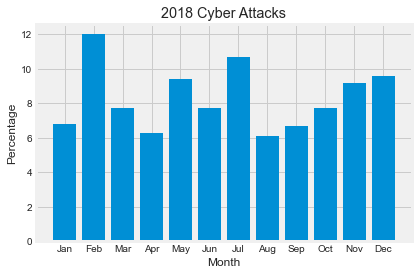

In [81]:
# graphing of 2018
from matplotlib import pyplot as plt
m2018 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p2018 = [  6.8,   12,  7.7,  6.3,  9.4,  7.7, 10.7,  6.1,  6.7,  7.7,  9.2, 9.6 ]
plt.bar(m2018,p2018)
plt.title("2018 Cyber Attacks")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.show()


In [82]:
twentyNine = Complete.loc[Complete['Year'] == 2019]
twentyNine

twentyNineMonth = twentyNine['subMonth'].value_counts().to_frame()
twentyNineMonth

twentyNineMonth = twentyNineMonth.div(445)
twentyNineMonth = twentyNineMonth.mul(100)
twentyNineMonth # percentage of attacks per month

,subMonth
Dec2019,14.831461
Nov2019,11.235955
Oct2019,6.067416
Apr2019,4.044944
Sep2019,2.921348
Jun2019,2.696629
May2019,2.696629
Jul2019,2.471910
Aug2019,2.022472
Mar2019,1.573034


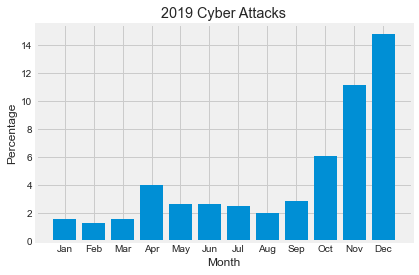

In [83]:
# Graphing of 2019
from matplotlib import pyplot as plt
m2019 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p2019 = [  1.6, 1.3,  1.6,     4,  2.7,  2.7,  2.5,    2,  2.9,  6.1, 11.2, 14.8]
plt.bar(m2019,p2019)
plt.title("2019 Cyber Attacks")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.show()


In [84]:
twentyTwenty = Complete.loc[Complete['Year'] == 2020]
twentyTwenty

twentyTwentyMonth = twentyNine['subMonth'].value_counts().to_frame()
twentyTwentyMonth

twentyTwentyMonth = twentyTwentyMonth.div(825)
twentyTwentyMonth = twentyTwentyMonth.mul(100)
twentyTwentyMonth # percentage of attacks per month

,subMonth
Dec2019,8.000000
Nov2019,6.060606
Oct2019,3.272727
Apr2019,2.181818
Sep2019,1.575758
Jun2019,1.454545
May2019,1.454545
Jul2019,1.333333
Aug2019,1.090909
Mar2019,0.848485


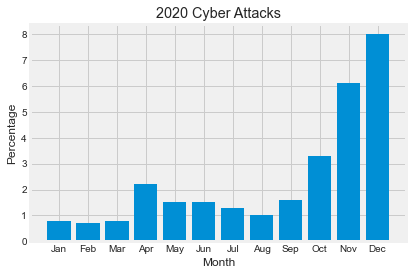

In [85]:
# Graphing of 2020
from matplotlib import pyplot as plt
m2020 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p2020 = [  .8,  0.7,  0.8,   2.2,  1.5,  1.5,  1.3,    1,  1.6,  3.3,  6.1,  8]
plt.bar(m2020,p2020)
plt.title("2020 Cyber Attacks")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.show()

In [86]:
twentyOne = Complete.loc[Complete['Year'] == 2021]
twentyOne

twentyOneMonth = twentyOne['subMonth'].value_counts().to_frame()
twentyOneMonth

twentyOneMonth = twentyOneMonth.div(445)
twentyOneMonth = twentyOneMonth.mul(100)
twentyOneMonth # percentage of attacks per month

,subMonth
Mar2021,22.696629
Feb2021,17.977528
Jun2021,17.752809
Apr2021,15.280899
May2021,13.483146
Jan2021,12.808989


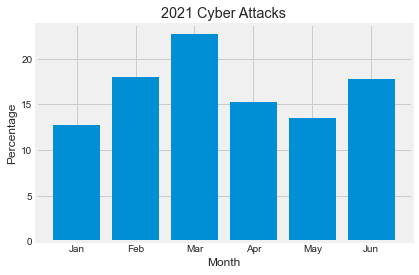

In [87]:
# Graphing of 2021
from matplotlib import pyplot as plt
m2021 = ['Jan','Feb','Mar','Apr','May','Jun']
p2021 = [ 12.8,   18, 22.7, 15.3, 13.5, 17.8]
plt.bar(m2021,p2021)
plt.title("2021 Cyber Attacks")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.show()

In [88]:
sList = sMonth.index.tolist()
sList # right now this list is in descending order

['Mar2021',
 'Sep2020',
 'Oct2020',
 'Feb2020',
 'Aug2020',
 'Feb2021',
 'Jun2021',
 'Nov2020',
 'Apr2021',
 'Mar2020',
 'Dec2019',
 'Jan2020',
 'Dec2020',
 'May2021',
 'Jan2021',
 'Apr2020',
 'May2020',
 'Feb2018',
 'Jul2020',
 'Nov2019',
 'Jul2018',
 'Dec2018',
 'May2018',
 'Nov2018',
 'Oct2018',
 'Mar2018',
 'Jun2018',
 'Sep2018',
 'Jan2018',
 'Apr2018',
 'Aug2018',
 'Oct2019',
 'Jun2020',
 'Apr2019',
 'Sep2019',
 'May2019',
 'Jun2019',
 'Jul2019',
 'Aug2019',
 'Jan2019',
 'Mar2019',
 'Feb2019']

In [89]:
pd.set_option('display.max_rows', None) # currently this seperates attacks into months, 
Complete['Month'].value_counts()  # HOwever we should try to seperate 2021 bc it only counts for a few months

2     224
3     209
12    175
4     171
5     170
11    166
1     161
10    160
6     153
9     144
8     119
7     113
Name: Month, dtype: int64

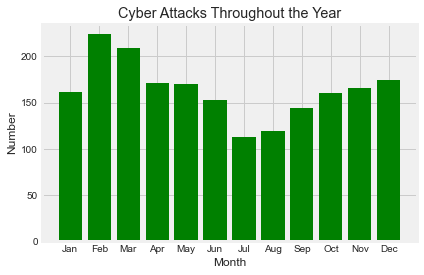

In [90]:
from matplotlib import pyplot as plt
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # should I get the average? YES
num=[161,224,209,171,170,153,     113,119,144,160,166,175]
plt.bar(months,num, color = 'green')
plt.title("Cyber Attacks Throughout the Year")
plt.xlabel("Month")
plt.ylabel("Number")
plt.show()

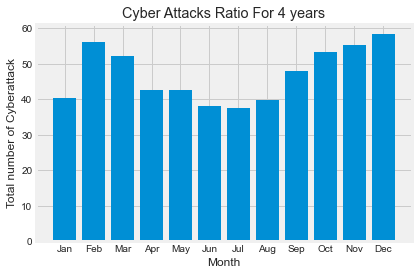

In [91]:
from matplotlib import pyplot as plt
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # should I get the average? I did
num=[161/4,224/4,209/4,171/4,170/4,153/4,     113/3,119/3,144/3,160/3,166/3,175/3]
# 1-6 months: 4 years
# 7-12 months: 3 years
plt.bar(months,num)
plt.title("Cyber Attacks Ratio For 4 years") # need a better name
plt.xlabel("Month")
plt.ylabel("Total number of Cyberattack")
plt.show()

In [92]:
pd.set_option('display.max_rows', None) # I dont think this is too important just thought it would be cool to investigate
Complete['Day'].value_counts()

1     82
20    76
16    76
9     73
29    71
19    71
28    69
11    69
12    69
3     68
18    68
14    68
21    68
7     67
10    65
22    64
8     63
13    59
23    59
17    59
5     59
24    58
4     58
26    58
2     58
30    57
27    56
25    56
15    53
6     50
31    38
Name: Day, dtype: int64

In [93]:
from matplotlib import pyplot as plt


In [94]:
pd.set_option('display.max_rows', None)
Complete['Attack'].value_counts()

Malware                                                                                                663
Account Hijacking                                                                                      329
Unknown                                                                                                317
Malware/PoS Malware                                                                                    101
Account Takeover                                                                                        87
Malicious Script Injection                                                                              56
Targeted Attack                                                                                         52
Account hijacking                                                                                       48
Vulnerability                                                                                           43
DDoS                                 

In [95]:
Complete['Target Class'].value_counts()

Q Human health and social work activities                                434
P Education                                                              284
O Public administration and defence, compulsory social security          229
M Professional scientific and technical activities                       137
X Individual                                                             114
K Financial and insurance activities                                      88
Y Multiple Industries                                                     83
J Information and communication                                           79
O Public administration, defence, compulsory social security              76
C Manufacturing                                                           74
R Arts entertainment and recreation                                       73
G Wholesale and retail trade                                              62
S Other service activities                                                52

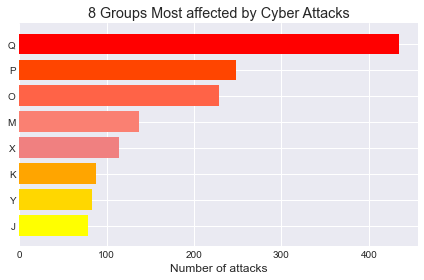

Q: Human Health and Social Work Activities
P: Education
O: Public administration and defence, compulsory social security
M: Professional scientific and technical activities 
X: Individual
K: Financial and insurance activities
Y: Multiple Industries
J: Information and communication


In [96]:
import csv   # create other column so that all the smaller 'targets' are accounted for
import numpy as np
from matplotlib import pyplot as plt

from collections import Counter

plt.style.use("seaborn-darkgrid")

groups=[434,248,229,137,114,88,83,79]
names=['Q', 'P', 'O', 'M', 'X', 'K', 'Y', 'J']
colors=['red', 'orangered', 'tomato', 'salmon', 'lightcoral','orange', 'gold', 'yellow']
#colors=[1,2,3,4,5,6,7,8]

groups.reverse()
names.reverse()
colors.reverse()

plt.barh(names, groups,color=colors)

plt.title("8 Groups Most affected by Cyber Attacks")
plt.xlabel("Number of attacks")


plt.tight_layout()

plt.show()

print('Q: Human Health and Social Work Activities')
print('P: Education')
print('O: Public administration and defence, compulsory social security')
print('M: Professional scientific and technical activities ')
print('X: Individual')
print('K: Financial and insurance activities')
print('Y: Multiple Industries')
print('J: Information and communication')

In [98]:
def deciMonth(row):
    if row['Month'] == 1:       # month days are 31
        return row['Day'] / 31
    elif row['Month'] == 3:
        return (row['Day'] / 31) + 2
    elif row['Month'] == 5:
        return (row['Day'] / 31) + 4
    elif row['Month'] == 7:
        return (row['Day'] / 31) + 6
    elif row['Month'] == 8:
        return (row['Day'] / 31) + 7
    elif row['Month'] == 10:
        return (row['Day'] / 31) + 9
    elif row['Month'] == 12:
        return (row['Day'] / 31)+ 11
    elif row['Month'] == 4:           # month days are 30
        return (row['Day'] / 30)+ 3
    elif row['Month'] == 6:
        return (row['Day'] / 30)+ 5
    elif row['Month'] == 9:
        return (row['Day'] / 30)+ 8
    elif row['Month'] == 11:
        return (row['Day'] / 30)+ 10
    elif row['Month'] == 2 and row['Year'] == 2020:     # leap year
        return (row['Day'] / 29) + 1
    elif row['Month'] == 2 and row['Year'] != 2020:
        return (row['Day'] / 28) + 1
    
  
    
Complete['deciMonth'] = Complete.apply(deciMonth, axis=1)

Complete

,Date,Attack,Target Class,Country,Day,Month,Year,subMonth,deciMonth
1,01/10/2018,Unknown,S Other service activities,US,1,10,2018,Oct2018,9.032258
3,02/10/2018,Malware/PoS Malware,K Financial and insurance activities,US,2,10,2018,Oct2018,9.064516
5,02/10/2018,Malware/PoS Malware,X Individual,US,2,10,2018,Oct2018,9.064516
9,03/10/2018,Targeted Attack,J Information and communication,US,3,10,2018,Oct2018,9.096774
12,03/10/2018,Account Hijacking,S Other service activities,US,3,10,2018,Oct2018,9.096774
13,04/10/2018,Targeted Attack,Y Multiple Industries,US,4,10,2018,Oct2018,9.129032
15,04/10/2018,Targeted Attack,"O Public administration, defence, compulsory s...",US,4,10,2018,Oct2018,9.129032
19,04/10/2018,Malware/PoS Malware,Q Human health and social work activities,US,4,10,2018,Oct2018,9.129032
25,05/10/2018,Malware/PoS Malware,"O Public administration, defence, compulsory s...",US,5,10,2018,Oct2018,9.161290
27,05/10/2018,Malware/PoS Malware,Q Human health and social work activities,US,5,10,2018,Oct2018,9.161290


In [99]:
Complete = Complete.drop(columns=['Date', 'Target Class', 'Country', 'Day', 'Year', 'subMonth'])
Complete

,Attack,Month,deciMonth
1,Unknown,10,9.032258
3,Malware/PoS Malware,10,9.064516
5,Malware/PoS Malware,10,9.064516
9,Targeted Attack,10,9.096774
12,Account Hijacking,10,9.096774
13,Targeted Attack,10,9.129032
15,Targeted Attack,10,9.129032
19,Malware/PoS Malware,10,9.129032
25,Malware/PoS Malware,10,9.161290
27,Malware/PoS Malware,10,9.161290


In [102]:
#Complete.to_csv('DataForCluster.csv')  # Exports a new csv to work with
